In [ ]:
##STEP 1A 1 – Load Data

##CSV loaded into a DataFrame

##Checked columns and first few rows

In [42]:
import sys
import subprocess

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

for package in ["pandas", "matplotlib", "seaborn"]:
    try:
        __import__(package)
    except ImportError:
        install(package)

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
sns.set(style="whitegrid")



In [46]:
file_path = "animal_intakes.csv"  # Change this if your file is in another folder
intake_df = pd.read_csv(r"C:\Users\D.Bhavitha\Downloads\archive\Austin_Animal_Center_Intakes.csv")



In [47]:
#  Quick look at the data
print("First 5 rows:\n", intake_df.head())
print("\nData info:\n", intake_df.info())
print("\nMissing values:\n", intake_df.isnull().sum())
print("\nColumns in dataset:\n", intake_df.columns)


First 5 rows:
   Animal ID     Name                DateTime               MonthYear  \
0   A786884   *Brock  01/03/2019 04:19:00 PM  01/03/2019 04:19:00 PM   
1   A706918    Belle  07/05/2015 12:59:00 PM  07/05/2015 12:59:00 PM   
2   A724273  Runster  04/14/2016 06:43:00 PM  04/14/2016 06:43:00 PM   
3   A665644      NaN  10/21/2013 07:59:00 AM  10/21/2013 07:59:00 AM   
4   A682524      Rio  06/29/2014 10:38:00 AM  06/29/2014 10:38:00 AM   

                        Found Location Intake Type Intake Condition  \
0  2501 Magin Meadow Dr in Austin (TX)       Stray           Normal   
1     9409 Bluegrass Dr in Austin (TX)       Stray           Normal   
2   2818 Palomino Trail in Austin (TX)       Stray           Normal   
3                          Austin (TX)       Stray             Sick   
4        800 Grove Blvd in Austin (TX)       Stray           Normal   

  Animal Type Sex upon Intake Age upon Intake  \
0         Dog   Neutered Male         2 years   
1         Dog   Spayed Fema

In [48]:
print("\nBasic stats for numerical columns:\n", intake_df.describe())
print("\nUnique values for key categorical columns:")
for col in ['Animal Type', 'Intake Type', 'Intake Condition']:
    print(f"{col}: {intake_df[col].nunique()} unique values")


Basic stats for numerical columns:
        Animal ID   Name                DateTime               MonthYear  \
count     124120  85069                  124120                  124120   
unique    110926  19748                   87660                   87660   
top      A721033    Max  09/23/2016 12:00:00 PM  09/23/2016 12:00:00 PM   
freq          33    564                      64                      64   

       Found Location Intake Type Intake Condition Animal Type  \
count          124120      124120           124120      124120   
unique          53703           6               10           5   
top       Austin (TX)       Stray           Normal         Dog   
freq            22859       86455           107952       70447   

       Sex upon Intake Age upon Intake                   Breed        Color  
count           124119          124120                  124120       124120  
unique               5              52                    2629          595  
top        Intact Male

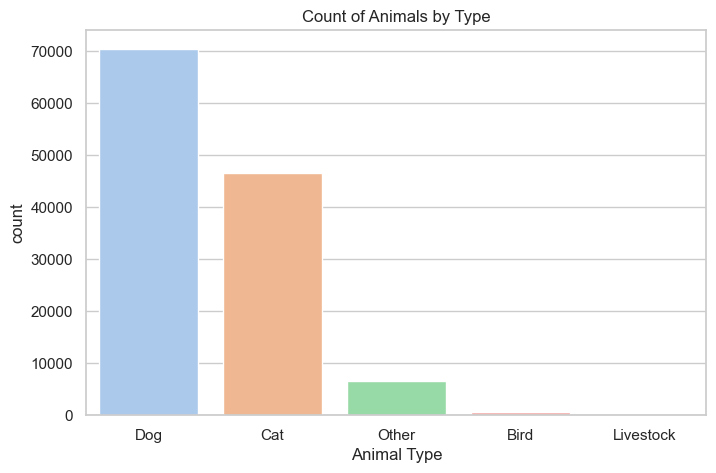

In [49]:
# Count of animals by type
plt.figure(figsize=(8,5))
sns.countplot(data=intake_df, x='Animal Type', palette='pastel', hue=None)
plt.title("Count of Animals by Type")
plt.show()

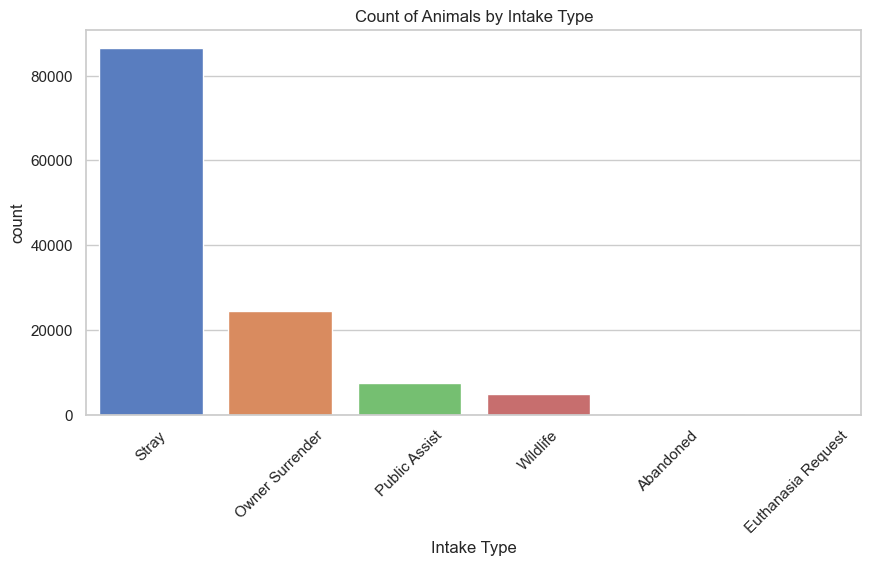

In [50]:
#  Count by Intake Type
plt.figure(figsize=(10,5))
sns.countplot(data=intake_df, x='Intake Type', order=intake_df['Intake Type'].value_counts().index, palette='muted')
plt.title("Count of Animals by Intake Type")
plt.xticks(rotation=45)
plt.show()


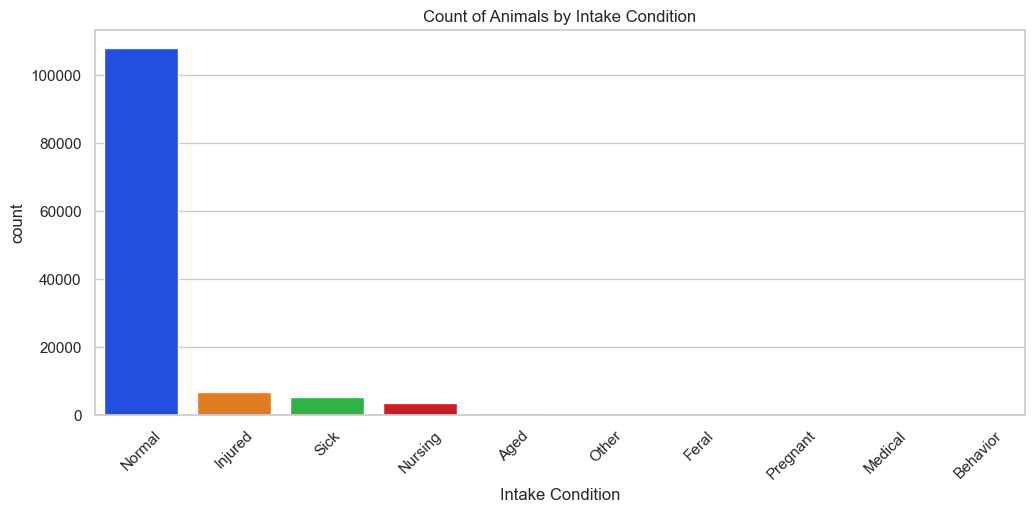

In [51]:
# Count by Intake Condition
plt.figure(figsize=(12,5))
sns.countplot(data=intake_df, x='Intake Condition', order=intake_df['Intake Condition'].value_counts().index, palette='bright')
plt.title("Count of Animals by Intake Condition")
plt.xticks(rotation=45)
plt.show()

In [ ]:
##Step 1b initial Cleaning & Date Conversion

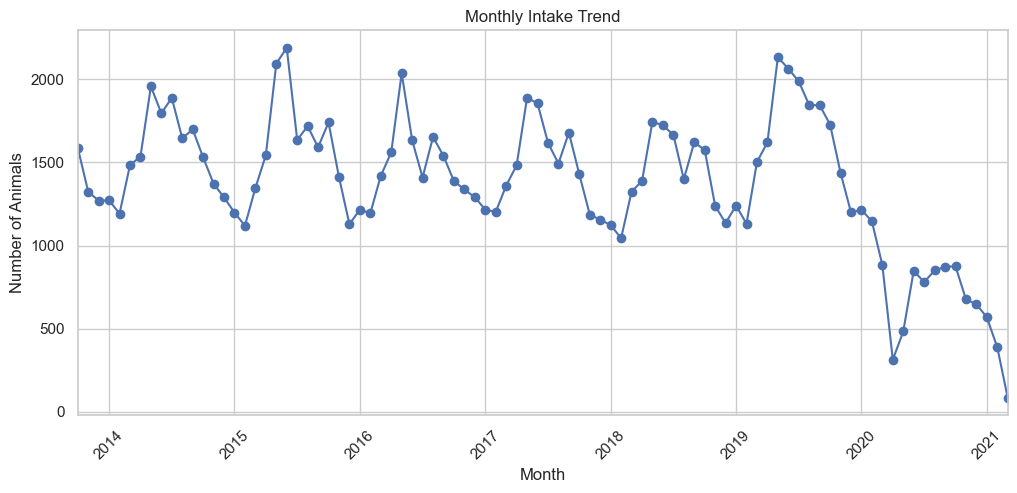

In [52]:
# Optional - Intake trend over time
# Convert 'Date of Intake' to datetime
# Clean column names (always good practice)
intake_df.columns = intake_df.columns.str.strip()

# Convert 'DateTime' to datetime
intake_df['DateTime'] = pd.to_datetime(intake_df['DateTime'], errors='coerce')

# Create 'Month' column for grouping
intake_df['Month'] = intake_df['DateTime'].dt.to_period('M')

# Monthly intake trend
monthly_intake = intake_df.groupby('Month').size()
plt.figure(figsize=(12,5))
monthly_intake.plot(kind='line', marker='o')
plt.title("Monthly Intake Trend")
plt.xlabel("Month")
plt.ylabel("Number of Animals")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Step 2: Data Cleaning / Exploration

In [53]:


# Check for missing values
print(intake_df.isnull().sum())

# Drop rows where critical info is missing
intake_df = intake_df.dropna(subset=['Animal Type', 'Intake Type', 'DateTime'])

# Check unique values for categorical columns
for col in ['Animal Type', 'Intake Type', 'Intake Condition']:
    print(f"{col}: {intake_df[col].unique()}")

# Standardize categories (example)
intake_df['Intake Condition'] = intake_df['Intake Condition'].str.title()
intake_df['Animal Type'] = intake_df['Animal Type'].str.title()


Animal ID               0
Name                39051
DateTime                0
MonthYear               0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake         1
Age upon Intake         0
Breed                   0
Color                   0
Month                   0
dtype: int64
Animal Type: ['Dog' 'Cat' 'Other' 'Bird' 'Livestock']
Intake Type: ['Stray' 'Owner Surrender' 'Public Assist' 'Wildlife' 'Euthanasia Request'
 'Abandoned']
Intake Condition: ['Normal' 'Sick' 'Injured' 'Nursing' 'Aged' 'Other' 'Feral' 'Medical'
 'Pregnant' 'Behavior']


In [ ]:
# Step 3: Analysis & Visualizations

In [57]:
#  Create Gender column from Sex upon Intake
def map_gender(sex):
    if pd.isna(sex):
        return 'Unknown'
    elif 'Male' in sex:
        return 'Male'
    elif 'Female' in sex:
        return 'Female'
    else:
        return 'Unknown'

# Apply the function
intake_df['Gender'] = intake_df['Sex upon Intake'].apply(map_gender)

# Step 2: Check if it worked
print(intake_df['Gender'].value_counts())


Gender
Male       59458
Female     54428
Unknown    10234
Name: count, dtype: int64


In [59]:
# ===============================

# ===============================

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

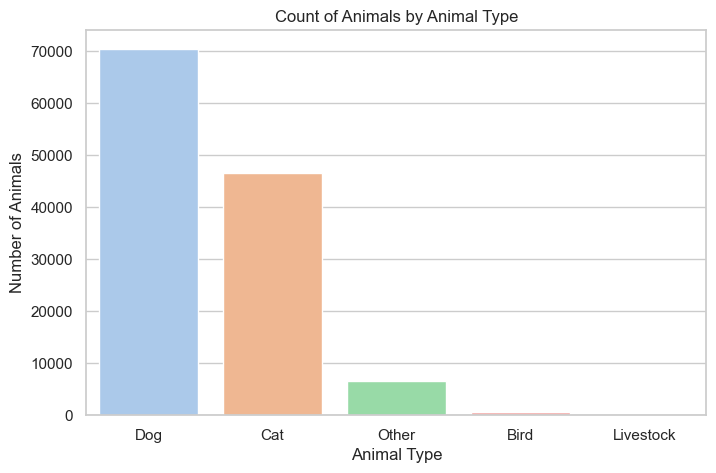

In [64]:
# ------------------------------
# 1. Count of Animals by Type
# ------------------------------
plt.figure(figsize=(8,5))
sns.countplot(data=intake_df, x='Animal Type', palette='pastel', hue=None)
plt.title("Count of Animals by Animal Type")
plt.ylabel("Number of Animals")
plt.show()

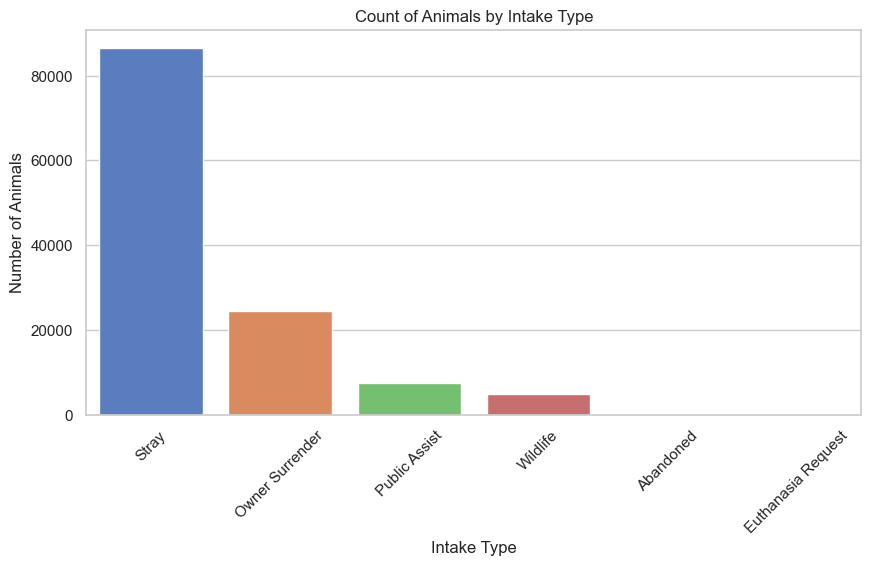

In [60]:
# ------------------------------
# 2. Count by Intake Type
# ------------------------------
plt.figure(figsize=(10,5))
sns.countplot(data=intake_df, x='Intake Type', 
              order=intake_df['Intake Type'].value_counts().index, 
              palette='muted', hue=None)
plt.title("Count of Animals by Intake Type")
plt.xticks(rotation=45)
plt.ylabel("Number of Animals")
plt.show()

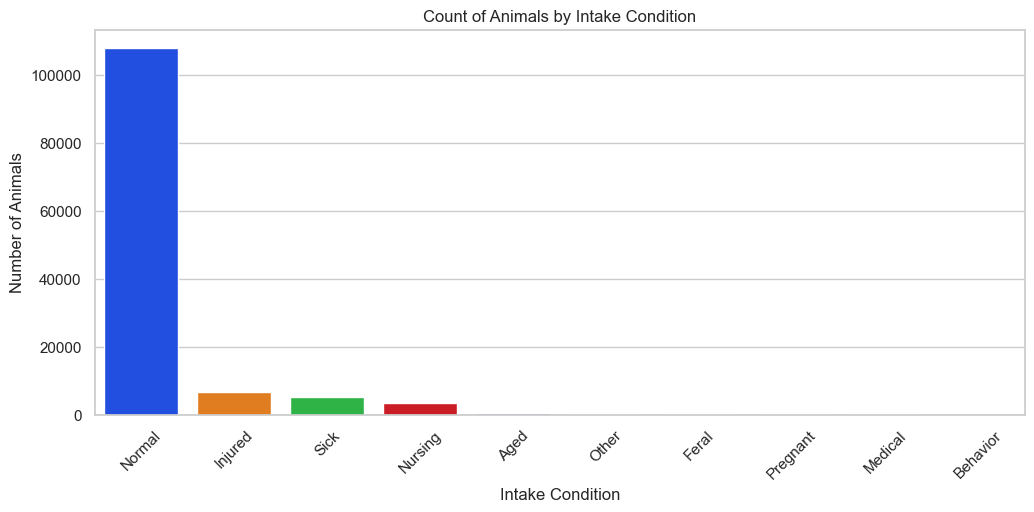

In [65]:
# ------------------------------
# 3. Count by Intake Condition
# ------------------------------
plt.figure(figsize=(12,5))
sns.countplot(data=intake_df, x='Intake Condition', 
              order=intake_df['Intake Condition'].value_counts().index, 
              palette='bright', hue=None)
plt.title("Count of Animals by Intake Condition")
plt.xticks(rotation=45)
plt.ylabel("Number of Animals")
plt.show()

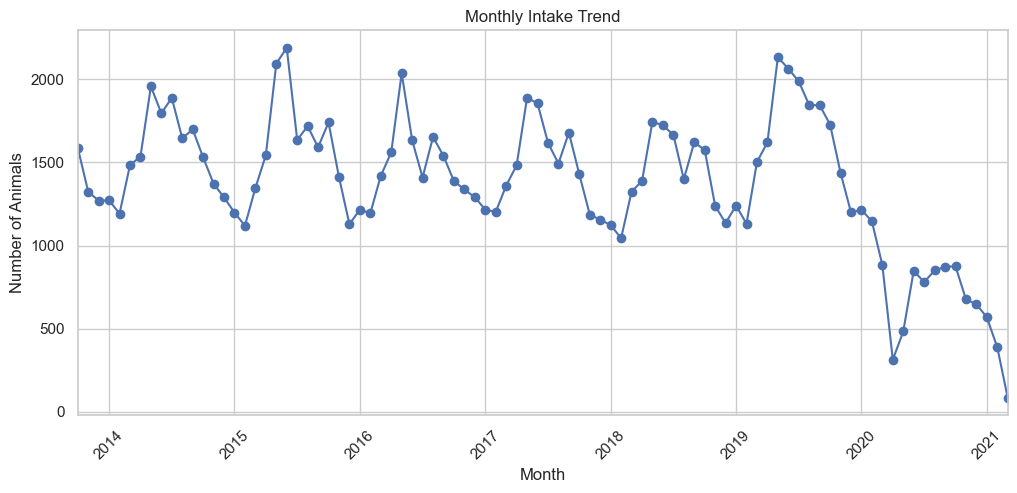

In [61]:
# ------------------------------
# 4. Monthly Intake Trend
# ------------------------------
plt.figure(figsize=(12,5))
monthly_intake = intake_df.groupby('Month').size()
monthly_intake.plot(kind='line', marker='o')
plt.title("Monthly Intake Trend")
plt.xlabel("Month")
plt.ylabel("Number of Animals")
plt.xticks(rotation=45)
plt.show()

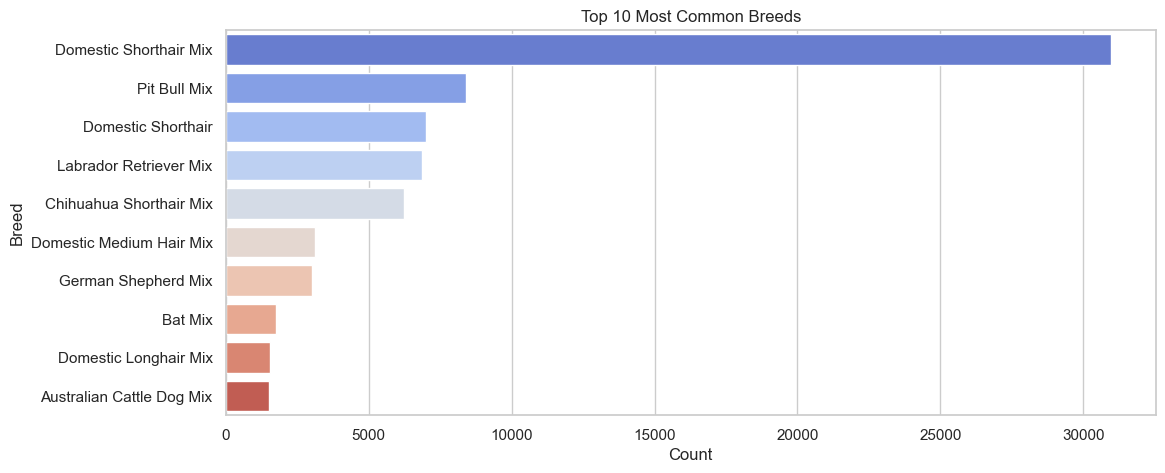

In [62]:
# ------------------------------
# 5. Most Common Breeds (Top 10)
# ------------------------------
top_breeds = intake_df['Breed'].value_counts().head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=top_breeds.values, y=top_breeds.index, palette='coolwarm')
plt.title("Top 10 Most Common Breeds")
plt.xlabel("Count")
plt.ylabel("Breed")
plt.show()

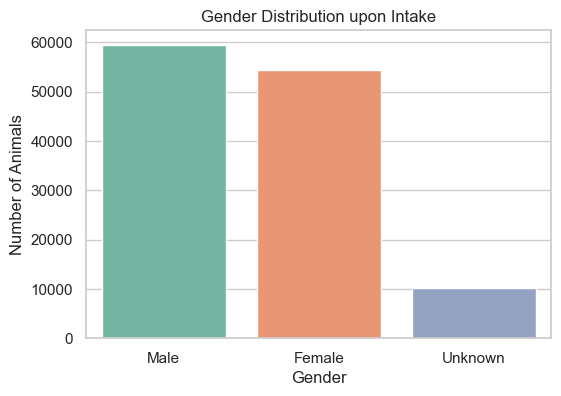

In [63]:
# ------------------------------
# 6. Sex Distribution
# ------------------------------
plt.figure(figsize=(6,4))
sns.countplot(data=intake_df, x='Gender', palette='Set2')
plt.title("Gender Distribution upon Intake")
plt.ylabel("Number of Animals")
plt.show()


Step 4: Insights & Conclusions 

1. Animal Types

Dogs and Cats are the most common animals taken into the shelter.

Other types like Birds, Livestock, or “Other” are much less frequent.

2. Intake Types

Most animals come in as Stray or Owner Surrender.

Public Assist, Wildlife, Abandoned, and Euthanasia Requests are less frequent.

3. Intake Conditions

The majority of animals arrive in Normal condition.

Some animals are Sick, Injured, or Medical, and a smaller number are Nursing, Pregnant, Aged, or Behavior cases.

4. Monthly Trends

The number of intakes varies month to month.

Identify peak months where shelters may require more resources.

5. Breeds

Top breeds are mostly Dogs and Cats.

This information can help shelters plan for breed-specific care or adoption programs.

6. Gender Distribution

Male and Female animals are roughly balanced.

Few missing entries are labeled as “Unknown”.

7. Optional Recommendations / Observations

Shelters can prepare resources based on intake trends (seasonal spikes).

Focus on common breeds for health checks, vaccination, and adoption programs.

Monitor intake conditions to identify health trends and improve care.